# Board Games Analysis
#### Predicting the rating for another board game

In [7]:
import pandas as pd
import numpy as np
board_games = pd.read_csv('board_games.csv')
print(board_games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

In [8]:
board_games = board_games.dropna(axis=0)
board_games = board_games[board_games['users_rated'] > 0]

In [9]:
print(board_games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

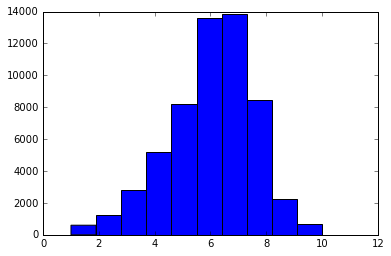

In [10]:
average_ratings = board_games['average_rating']
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(average_ratings)
plt.show()

In [11]:
print(average_ratings.std())
print(average_ratings.mean())

1.57882993483
6.01611284933


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
numeric_columns = board_games.iloc[:,3:]

In [14]:
kmeans_model.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [15]:
labels = kmeans_model.labels_
print(labels)

[1 1 1 ..., 0 0 0]


In [16]:
game_mean = numeric_columns.apply(np.mean, axis=1)

In [17]:
print(game_mean)

0        4478.431293
1        3088.451729
2        2259.009636
3        2852.172936
4        7580.177296
5        7869.269574
6        3488.818294
7        3080.732679
8        3250.362364
9        3246.403405
10       6632.371274
11       1255.041491
12       1060.583884
13       2667.186476
14       3167.116141
15       1824.625254
16       2471.526979
17       2269.558746
18       7085.071643
19       3682.607443
20       1568.860090
21       3787.645789
22       2217.973394
23       5597.606346
24       2641.436587
25       3073.474584
26       2084.640816
27       3988.717611
28       3997.052251
29       2680.055045
            ...     
81134      11.571429
81160       5.571429
81162       7.214286
81176      18.657143
81177      18.657143
81178      18.414286
81179      18.636905
81180      18.636905
81181      18.571429
81184      18.357143
81188       5.714286
81190      19.714286
81192       8.500000
81193       8.250000
81195       4.000000
81198       6.357143
81199      10

In [18]:
game_std = numeric_columns.apply(np.std, axis=1)
print(game_std)

0         8040.437370
1         5322.436479
2         3789.509001
3         4704.902345
4        14383.201832
5        14936.931887
6         6973.224608
7         5488.216568
8         6211.445822
9         5696.348094
10       12461.001242
11        2324.702919
12        1802.727041
13        4669.931707
14        5482.509820
15        3043.820059
16        4463.697756
17        4040.565229
18       14051.323086
19        6459.403148
20        2655.618249
21        7942.210478
22        3620.639845
23       10682.617610
24        5560.221111
25        5333.882171
26        3889.049491
27        7600.587085
28        7418.385554
29        4406.052406
             ...     
81134       20.356516
81160       11.617193
81162       10.738306
81176       24.644609
81177       24.508008
81178       24.543892
81179       24.537136
81180       24.537136
81181       24.703135
81184       32.921133
81188       10.381498
81190       32.358325
81192        9.037620
81193        8.796814
81195     

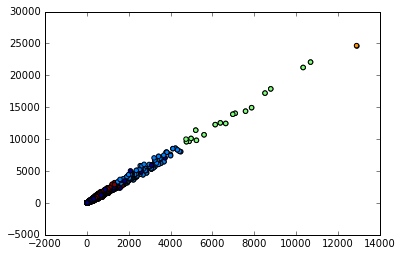

In [19]:
plt.scatter(x=game_mean,y=game_std, c=labels)
plt.show()

In [24]:
correlations = board_games.corr()
print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cols = ['yearpublished','minage','average_weight']
model.fit(cols, board_games['average_rating'])
predictions = model.predict(cols)
mse = mean_squared_error(board_games['average_rating'], predictions)
print(mse)

ValueError: cannot copy sequence with size 56894 to array axis with dimension 1